In [1]:
import pandas as pd

# CSV Files aus weather_and_wildfires.ipynb laden
df3 = pd.read_csv('df3_data.csv')


In [2]:
df3['date'] = pd.to_datetime(df3['date'])

In [3]:
# Rename column um Analyse zu vereinfachen
df3.rename(columns={'states': 'state_name'}, inplace=True)

In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550396 entries, 0 to 550395
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  550396 non-null  datetime64[ns]
 1   average_temp_c        474561 non-null  float64       
 2   minimum_temp_c        502218 non-null  float64       
 3   maximum_temp_c        502541 non-null  float64       
 4   precipitation_mm      442942 non-null  float64       
 5   snow_mm               322039 non-null  float64       
 6   wind_direction_deg    116755 non-null  float64       
 7   windspeed_kmh         479642 non-null  float64       
 8   peak_wind_gust_kmh    19844 non-null   float64       
 9   air_pressure_hpa      412122 non-null  float64       
 10  sunshine_min          96923 non-null   float64       
 11  station_id            550396 non-null  object        
 12  weather_station_name  550396 non-null  object        
 13 

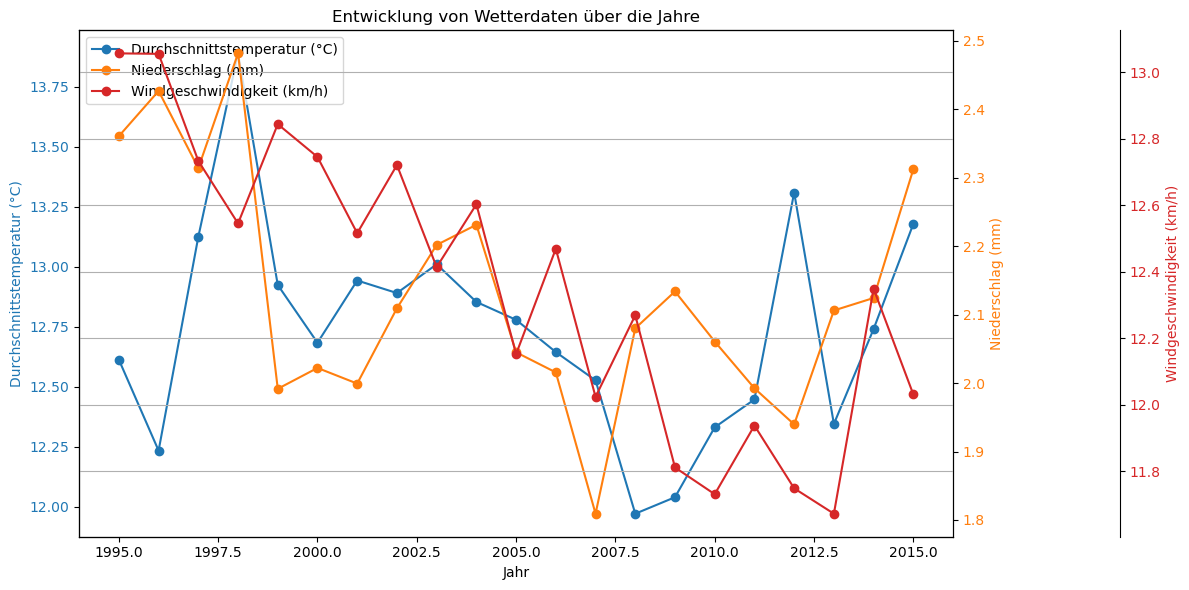

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Gruppieren Sie Ihre Daten nach Jahr und berechnen Sie den Durchschnitt für jede Spalte
yearly_data = df3.groupby('year')[['average_temp_c', 'precipitation_mm', 'windspeed_kmh']].mean()

# Erstellen Sie den Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperatur (linke y-Achse)
ax1.plot(yearly_data.index, yearly_data['average_temp_c'], label='Durchschnittstemperatur (°C)', marker='o', linestyle='-')
ax1.set_xlabel('Jahr')
ax1.set_ylabel('Durchschnittstemperatur (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Niederschlag
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['precipitation_mm'], label='Niederschlag (mm)', marker='o', linestyle='-', color='tab:orange')
ax2.set_ylabel('Niederschlag (mm)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Windgeschwindigkeit
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 120))
ax3.plot(yearly_data.index, yearly_data['windspeed_kmh'], label='Windgeschwindigkeit (km/h)', marker='o', linestyle='-', color='tab:red')
ax3.set_ylabel('Windgeschwindigkeit (km/h)', color='tab:red')
ax3.tick_params(axis='y', labelcolor='tab:red')

# Legenden
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

plt.title('Entwicklung von Wetterdaten über die Jahre')
plt.grid(True)
plt.tight_layout()
plt.show()


Idaho

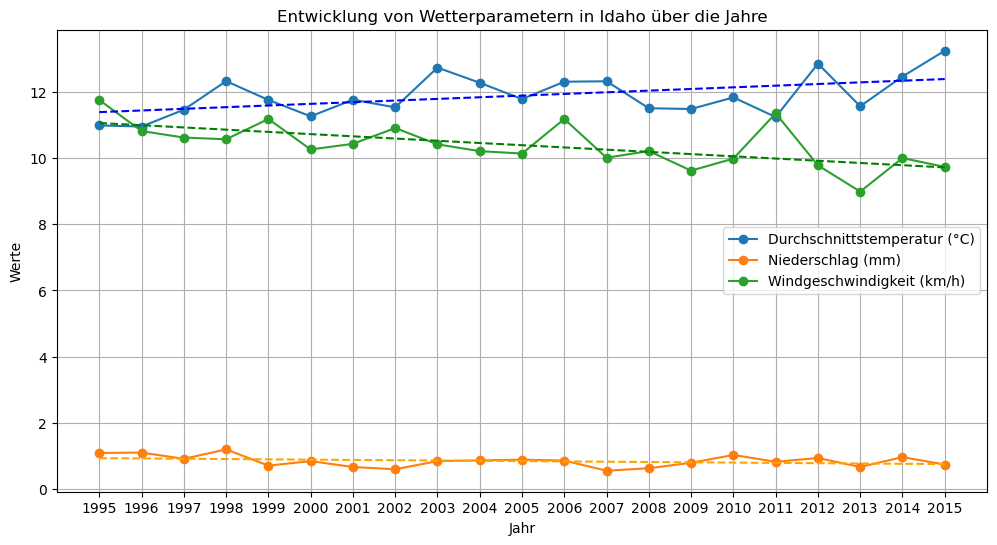

In [11]:
import matplotlib.pyplot as plt

# State Filter
idaho_data = df3[df3['state_name'] == 'Idaho']

# Gruppierung der 3 Untersuchungsbereiche nach Jahr
grouped_data = idaho_data.groupby('year')[['average_temp_c', 'precipitation_mm', 'windspeed_kmh']].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))

# Durchschnittstemperatur
plt.plot(grouped_data['year'], grouped_data['average_temp_c'], label='Durchschnittstemperatur (°C)', marker='o')

# Niederschlag
plt.plot(grouped_data['year'], grouped_data['precipitation_mm'], label='Niederschlag (mm)', marker='o')

# Windgeschwindigkeit
plt.plot(grouped_data['year'], grouped_data['windspeed_kmh'], label='Windgeschwindigkeit (km/h)', marker='o')

# X-Achse als Integer anzeigen
plt.xticks(grouped_data['year'].astype(int))

# Trendlinien hinzufügen
z_temp = np.polyfit(grouped_data['year'], grouped_data['average_temp_c'], 1)
p_temp = np.poly1d(z_temp)
plt.plot(grouped_data['year'], p_temp(grouped_data['year']), linestyle='--', color='blue')

z_precip = np.polyfit(grouped_data['year'], grouped_data['precipitation_mm'], 1)
p_precip = np.poly1d(z_precip)
plt.plot(grouped_data['year'], p_precip(grouped_data['year']), linestyle='--', color='orange')

z_wind = np.polyfit(grouped_data['year'], grouped_data['windspeed_kmh'], 1)
p_wind = np.poly1d(z_wind)
plt.plot(grouped_data['year'], p_wind(grouped_data['year']), linestyle='--', color='green')

# Legende und Beschriftungen
plt.legend()
plt.title('Entwicklung von Wetterparametern in Idaho über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Werte')
plt.grid(True)

# Diagramm anzeigen
plt.show()


Konstanter Niederschlag
Abnehmende Windgeschwindigkeit um ca. 1 km/h 
Ansteigende Durchschnittstemperatur um ca. 0,5 Grad 

Oregon

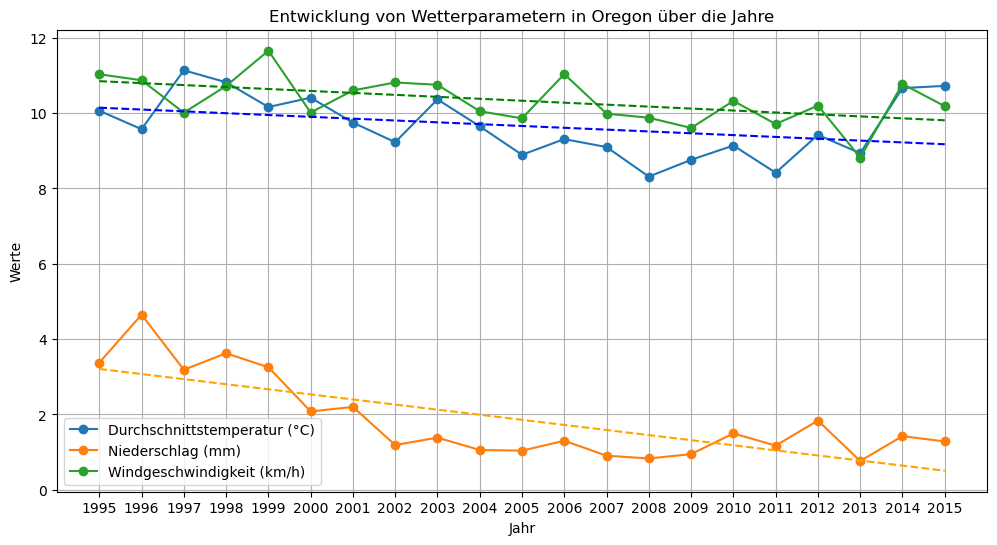

In [13]:
import matplotlib.pyplot as plt

# Filtern Sie die Daten für den Bundesstaat "Oregon"
oregon_data = df3[df3['state_name'] == 'Oregon']

# Gruppieren Sie die Daten nach Jahr und berechnen Sie den Durchschnitt
grouped_data = oregon_data.groupby('year')[['average_temp_c', 'precipitation_mm', 'windspeed_kmh']].mean().reset_index()

# Erstellen Sie den Plot
plt.figure(figsize=(12, 6))

# Durchschnittstemperatur
plt.plot(grouped_data['year'], grouped_data['average_temp_c'], label='Durchschnittstemperatur (°C)', marker='o')

# Niederschlag
plt.plot(grouped_data['year'], grouped_data['precipitation_mm'], label='Niederschlag (mm)', marker='o')

# Windgeschwindigkeit
plt.plot(grouped_data['year'], grouped_data['windspeed_kmh'], label='Windgeschwindigkeit (km/h)', marker='o')

# X-Achse als Integer anzeigen
plt.xticks(grouped_data['year'].astype(int))

# Trendlinien hinzufügen
z_temp = np.polyfit(grouped_data['year'], grouped_data['average_temp_c'], 1)
p_temp = np.poly1d(z_temp)
plt.plot(grouped_data['year'], p_temp(grouped_data['year']), linestyle='--', color='blue')

z_precip = np.polyfit(grouped_data['year'], grouped_data['precipitation_mm'], 1)
p_precip = np.poly1d(z_precip)
plt.plot(grouped_data['year'], p_precip(grouped_data['year']), linestyle='--', color='orange')

z_wind = np.polyfit(grouped_data['year'], grouped_data['windspeed_kmh'], 1)
p_wind = np.poly1d(z_wind)
plt.plot(grouped_data['year'], p_wind(grouped_data['year']), linestyle='--', color='green')

# Legende und Beschriftungen
plt.legend()
plt.title('Entwicklung von Wetterparametern in Oregon über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Werte')
plt.grid(True)

# Diagramm anzeigen
plt.show()


Stark abnehmender Niederschlag um ca. 2 mm
Abnehmende Windgeschwindigkeit um ca. 1 km/h 
Abnehmende Durchschnittstemperatur um ca. 0,5 Grad 

California

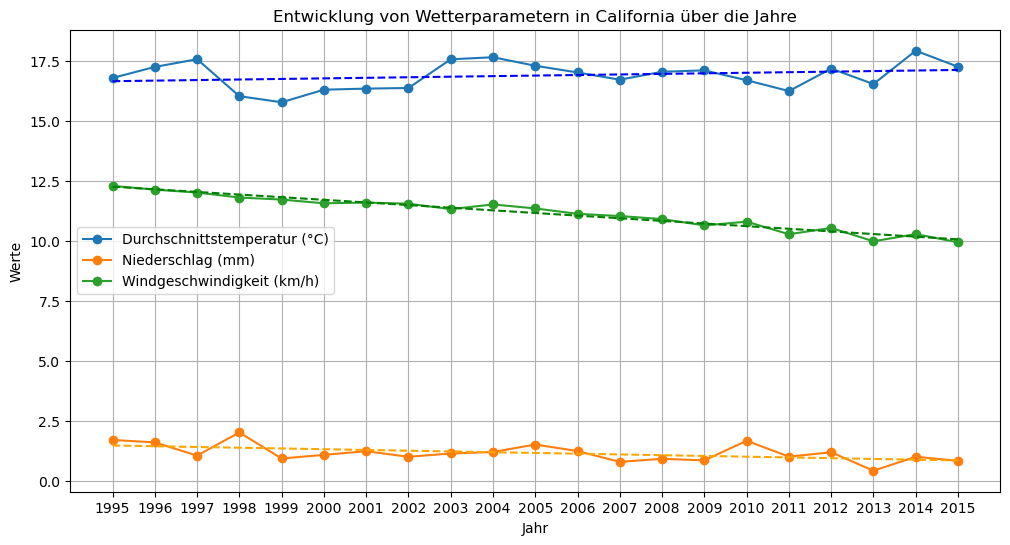

In [14]:
import matplotlib.pyplot as plt

# Filtern Sie die Daten für den Bundesstaat "California"
california_data = df3[df3['state_name'] == 'California']

# Gruppieren Sie die Daten nach Jahr und berechnen Sie den Durchschnitt
grouped_data = california_data.groupby('year')[['average_temp_c', 'precipitation_mm', 'windspeed_kmh']].mean().reset_index()

# Erstellen Sie den Plot
plt.figure(figsize=(12, 6))

# Durchschnittstemperatur
plt.plot(grouped_data['year'], grouped_data['average_temp_c'], label='Durchschnittstemperatur (°C)', marker='o')

# Niederschlag
plt.plot(grouped_data['year'], grouped_data['precipitation_mm'], label='Niederschlag (mm)', marker='o')

# Windgeschwindigkeit
plt.plot(grouped_data['year'], grouped_data['windspeed_kmh'], label='Windgeschwindigkeit (km/h)', marker='o')

# X-Achse als Integer anzeigen
plt.xticks(grouped_data['year'].astype(int))

# Trendlinien hinzufügen
z_temp = np.polyfit(grouped_data['year'], grouped_data['average_temp_c'], 1)
p_temp = np.poly1d(z_temp)
plt.plot(grouped_data['year'], p_temp(grouped_data['year']), linestyle='--', color='blue')

z_precip = np.polyfit(grouped_data['year'], grouped_data['precipitation_mm'], 1)
p_precip = np.poly1d(z_precip)
plt.plot(grouped_data['year'], p_precip(grouped_data['year']), linestyle='--', color='orange')

z_wind = np.polyfit(grouped_data['year'], grouped_data['windspeed_kmh'], 1)
p_wind = np.poly1d(z_wind)
plt.plot(grouped_data['year'], p_wind(grouped_data['year']), linestyle='--', color='green')

# Legende und Beschriftungen
plt.legend()
plt.title('Entwicklung von Wetterparametern in California über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Werte')
plt.grid(True)

# Diagramm anzeigen
plt.show()


Abnehmender Niederschlag um ca. 1 mm
Stark abnehmende Windgeschwindigkeit um ca. 2.5 km/h 
Ansteigende Durchschnittstemperatur um ca. 1 Grad 

Arizona

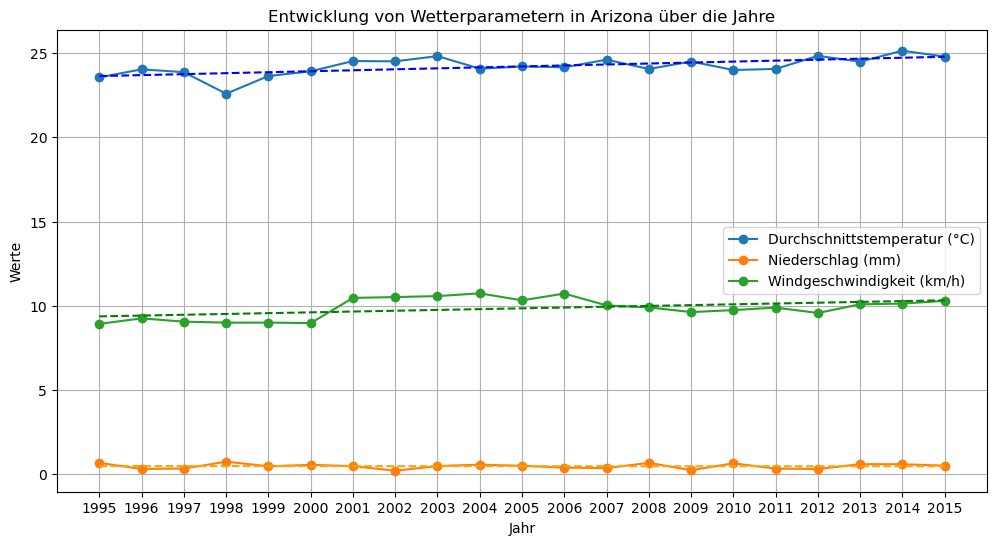

In [15]:
import matplotlib.pyplot as plt

# Filtern Sie die Daten für den Bundesstaat "Arizona"
arizona_data = df3[df3['state_name'] == 'Arizona']

# Gruppieren Sie die Daten nach Jahr und berechnen Sie den Durchschnitt
grouped_data = arizona_data.groupby('year')[['average_temp_c', 'precipitation_mm', 'windspeed_kmh']].mean().reset_index()

# Erstellen Sie den Plot
plt.figure(figsize=(12, 6))

# Durchschnittstemperatur
plt.plot(grouped_data['year'], grouped_data['average_temp_c'], label='Durchschnittstemperatur (°C)', marker='o')

# Niederschlag
plt.plot(grouped_data['year'], grouped_data['precipitation_mm'], label='Niederschlag (mm)', marker='o')

# Windgeschwindigkeit
plt.plot(grouped_data['year'], grouped_data['windspeed_kmh'], label='Windgeschwindigkeit (km/h)', marker='o')

# X-Achse als Integer anzeigen
plt.xticks(grouped_data['year'].astype(int))

# Trendlinien hinzufügen
z_temp = np.polyfit(grouped_data['year'], grouped_data['average_temp_c'], 1)
p_temp = np.poly1d(z_temp)
plt.plot(grouped_data['year'], p_temp(grouped_data['year']), linestyle='--', color='blue')

z_precip = np.polyfit(grouped_data['year'], grouped_data['precipitation_mm'], 1)
p_precip = np.poly1d(z_precip)
plt.plot(grouped_data['year'], p_precip(grouped_data['year']), linestyle='--', color='orange')

z_wind = np.polyfit(grouped_data['year'], grouped_data['windspeed_kmh'], 1)
p_wind = np.poly1d(z_wind)
plt.plot(grouped_data['year'], p_wind(grouped_data['year']), linestyle='--', color='green')

# Legende und Beschriftungen
plt.legend()
plt.title('Entwicklung von Wetterparametern in Arizona über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Werte')
plt.grid(True)

# Diagramm anzeigen
plt.show()


In [ ]:
Konstanter Niederschlag 
Ansteigende Windgeschwindigkeit um ca. 1.5 km/h 
Stark ansteigende Durchschnittstemperatur um ca. 1.5 Grad 

New Mexico

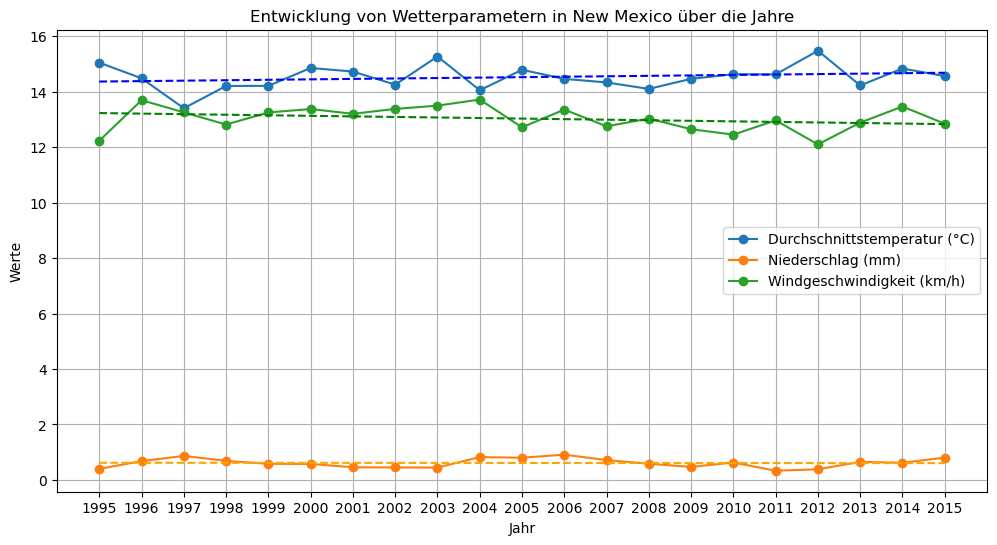

In [16]:
import matplotlib.pyplot as plt

# Filtern Sie die Daten für den Bundesstaat "New Mexico"
new_mexico_data = df3[df3['state_name'] == 'New Mexico']

# Gruppieren Sie die Daten nach Jahr und berechnen Sie den Durchschnitt
grouped_data = new_mexico_data.groupby('year')[['average_temp_c', 'precipitation_mm', 'windspeed_kmh']].mean().reset_index()

# Erstellen Sie den Plot
plt.figure(figsize=(12, 6))

# Durchschnittstemperatur
plt.plot(grouped_data['year'], grouped_data['average_temp_c'], label='Durchschnittstemperatur (°C)', marker='o')

# Niederschlag
plt.plot(grouped_data['year'], grouped_data['precipitation_mm'], label='Niederschlag (mm)', marker='o')

# Windgeschwindigkeit
plt.plot(grouped_data['year'], grouped_data['windspeed_kmh'], label='Windgeschwindigkeit (km/h)', marker='o')

# X-Achse als Integer anzeigen
plt.xticks(grouped_data['year'].astype(int))

# Trendlinien hinzufügen
z_temp = np.polyfit(grouped_data['year'], grouped_data['average_temp_c'], 1)
p_temp = np.poly1d(z_temp)
plt.plot(grouped_data['year'], p_temp(grouped_data['year']), linestyle='--', color='blue')

z_precip = np.polyfit(grouped_data['year'], grouped_data['precipitation_mm'], 1)
p_precip = np.poly1d(z_precip)
plt.plot(grouped_data['year'], p_precip(grouped_data['year']), linestyle='--', color='orange')

z_wind = np.polyfit(grouped_data['year'], grouped_data['windspeed_kmh'], 1)
p_wind = np.poly1d(z_wind)
plt.plot(grouped_data['year'], p_wind(grouped_data['year']), linestyle='--', color='green')

# Legende und Beschriftungen
plt.legend()
plt.title('Entwicklung von Wetterparametern in New Mexico über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Werte')
plt.grid(True)

# Diagramm anzeigen
plt.show()


In [ ]:
Konstanter Niederschlag 
Abnehmende Windgeschwindigkeit um ca. 0.5 km/h 
Ansteigende Durchschnittstemperatur um ca. 0.5 Grad 